# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


The end date is 12-30

In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"1201-"+s_e_year+"1130.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"1201-"+s_e_year+"1130.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-30"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-30"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-30"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-30"].min())
    ds_merge_ts_reg.loc["2015-12-30"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-30"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-30"].min())
    ds_merge_ts_reg_mask.loc["2015-12-30"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-30"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-30"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval
        s_s_year = str(s_year)
        s_e_year = str(e_year)    
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"1201-"+s_e_year+"1130.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"1201-"+s_e_year+"1130.nc")[var]     
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-30"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-30"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-30"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-30"].min())
    ds_merge_ts_reg.loc["2070-12-30"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-30"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-30"].min())
    ds_merge_ts_reg_mask.loc["2070-12-30"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-30"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-30"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "HadGEM2-CC"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_nc/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_csv/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/huss_day_HadGEM2-CC_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.5554342269897461 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/huss_day_HadGEM2-CC_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.037583351135254 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/huss_day_HadGEM2-CC_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.6447529792785645 to load the data
*********Start to merge*********
It takes elapsed_time 5.443194150924683 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.08977627754211426 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.138795852661133 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6647434234619141 to mask the layer
*********Start to plot the layer*********


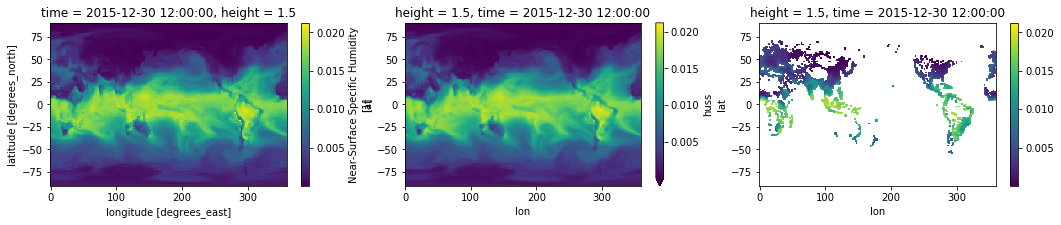

It takes elapsed_time 0.7451598644256592 to plot the layer
It takes elapsed_time 17.72775149345398 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/tas_day_HadGEM2-CC_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.5838074684143066 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/tas_day_HadGEM2-CC_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.1289680004119873 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/tas_day_HadGEM2-CC_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.7284965515136719 to load the data
*********Start to merge*********
It takes elapsed_time 5.501377105712891 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.02679920196533203 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.100032806396484 to regrid the lay

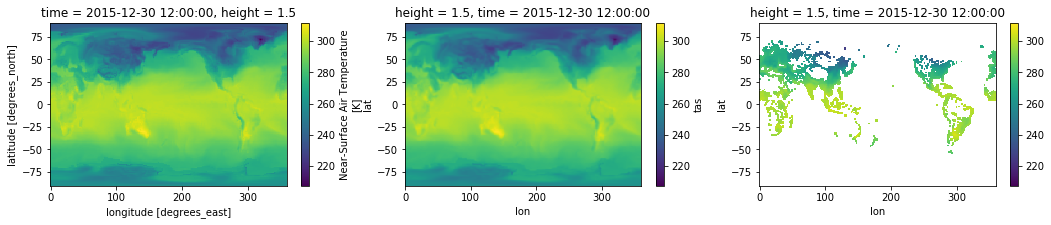

It takes elapsed_time 0.7365143299102783 to plot the layer
It takes elapsed_time 17.747138023376465 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/uas_day_HadGEM2-CC_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.5564379692077637 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/uas_day_HadGEM2-CC_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.0727035999298096 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/uas_day_HadGEM2-CC_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.6114497184753418 to load the data
*********Start to merge*********
It takes elapsed_time 5.463456392288208 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_144x192_192x288_peri.nc
It takes elapsed_time 0.07152009010314941 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.09919786453247 to regrid the layer

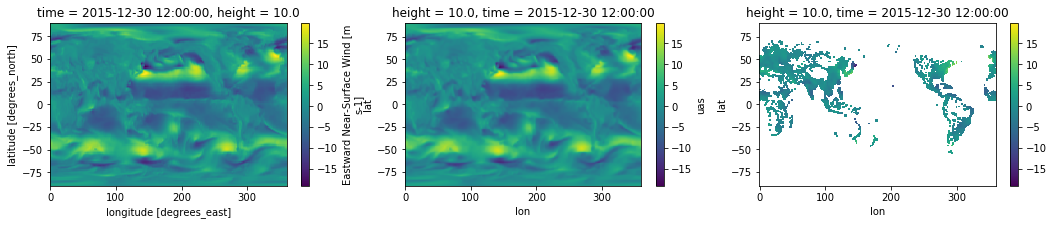

It takes elapsed_time 0.7709434032440186 to plot the layer
It takes elapsed_time 17.672998189926147 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/vas_day_HadGEM2-CC_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.492783784866333 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/vas_day_HadGEM2-CC_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.0101292133331299 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/vas_day_HadGEM2-CC_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.9169511795043945 to load the data
*********Start to merge*********
It takes elapsed_time 5.474681615829468 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_144x192_192x288_peri.nc
It takes elapsed_time 0.02637648582458496 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.061761617660522 to regrid the layer

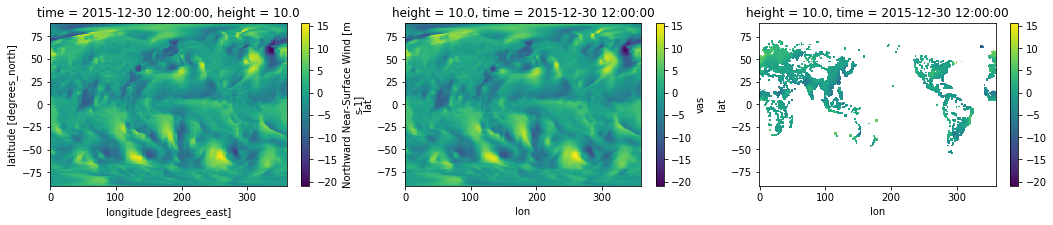

It takes elapsed_time 0.7774820327758789 to plot the layer
It takes elapsed_time 17.908478498458862 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/pr_day_HadGEM2-CC_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.6413311958312988 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/pr_day_HadGEM2-CC_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.2932164669036865 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/pr_day_HadGEM2-CC_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.8737781047821045 to load the data
*********Start to merge*********
It takes elapsed_time 5.508319139480591 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.02613997459411621 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.071386814117432 to regrid the layer
**

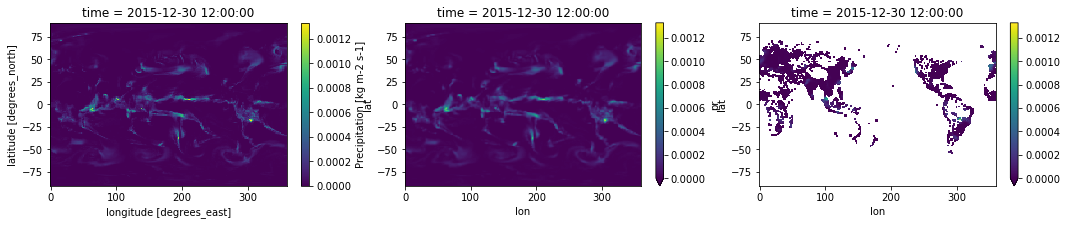

It takes elapsed_time 0.6952817440032959 to plot the layer
It takes elapsed_time 17.82500982284546 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/prsn_day_HadGEM2-CC_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.5498344898223877 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/prsn_day_HadGEM2-CC_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.036330223083496 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/prsn_day_HadGEM2-CC_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.5910460948944092 to load the data
*********Start to merge*********
It takes elapsed_time 5.354611396789551 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.02573394775390625 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.075039863586426 to regrid the laye

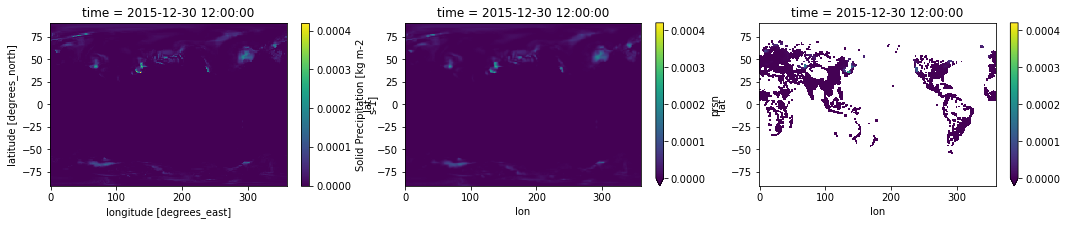

It takes elapsed_time 0.651235818862915 to plot the layer
It takes elapsed_time 17.344645738601685 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rlds_day_HadGEM2-CC_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.6416211128234863 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rlds_day_HadGEM2-CC_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.2145774364471436 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rlds_day_HadGEM2-CC_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.7851653099060059 to load the data
*********Start to merge*********
It takes elapsed_time 5.3578197956085205 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.025948286056518555 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.067174911499023 to regrid t

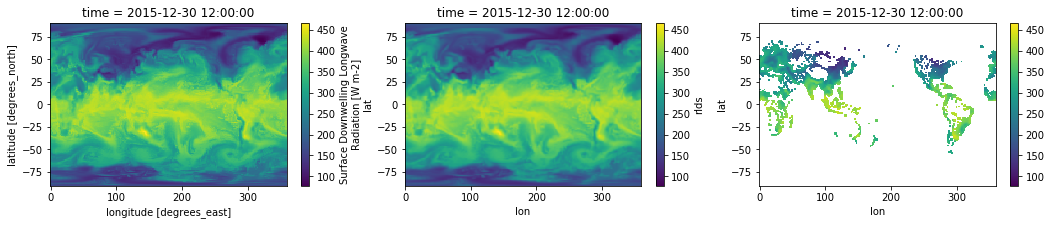

It takes elapsed_time 0.7266745567321777 to plot the layer
It takes elapsed_time 17.610836029052734 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rlus_day_HadGEM2-CC_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.5691204071044922 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rlus_day_HadGEM2-CC_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.081348180770874 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rlus_day_HadGEM2-CC_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.6013829708099365 to load the data
*********Start to merge*********
It takes elapsed_time 5.372944116592407 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.025238513946533203 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.069120645523071 to regrid th

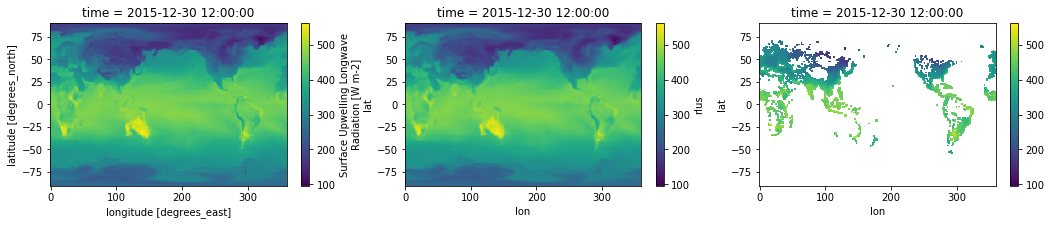

It takes elapsed_time 0.6902096271514893 to plot the layer
It takes elapsed_time 17.40489387512207 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rsds_day_HadGEM2-CC_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.5360655784606934 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rsds_day_HadGEM2-CC_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.153827428817749 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rsds_day_HadGEM2-CC_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.7368602752685547 to load the data
*********Start to merge*********
It takes elapsed_time 5.353380918502808 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.08186030387878418 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.06371521949768 to regrid the l

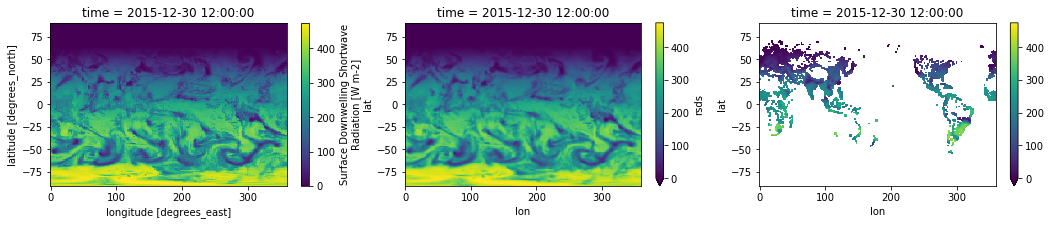

It takes elapsed_time 0.6873199939727783 to plot the layer
It takes elapsed_time 17.570619344711304 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rsus_day_HadGEM2-CC_rcp85_r1i1p1_20051201-20101130.nc
It takes elapsed_time 0.5053489208221436 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rsus_day_HadGEM2-CC_rcp85_r1i1p1_20101201-20151130.nc
It takes elapsed_time 1.0277297496795654 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rsus_day_HadGEM2-CC_rcp85_r1i1p1_20151201-20201130.nc
It takes elapsed_time 1.618311882019043 to load the data
*********Start to merge*********
It takes elapsed_time 5.368000745773315 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.025421857833862305 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.110350370407104 to regrid th

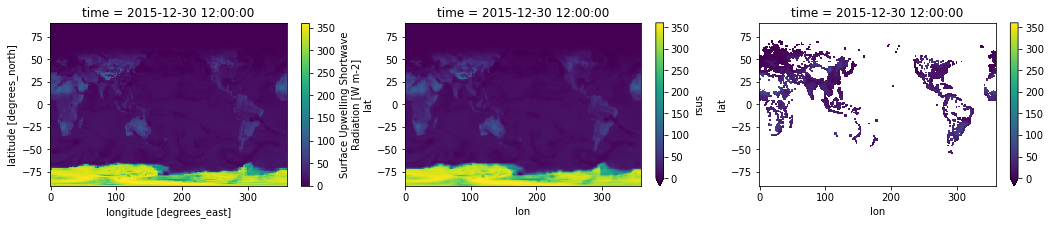

It takes elapsed_time 0.7048189640045166 to plot the layer
It takes elapsed_time 17.47346568107605 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2005, 2016, 5)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 27.797203302383423 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

248.42227578163147


# Step 3: 2061-2070 

In [7]:
del ds, df
gc.collect()

0

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/huss_day_HadGEM2-CC_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.5438950061798096 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/huss_day_HadGEM2-CC_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.1802699565887451 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/huss_day_HadGEM2-CC_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.7302815914154053 to load the data
*********Start to merge*********
It takes elapsed_time 5.40015983581543 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.08337593078613281 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.1092848777771 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6466946601867676 to mask the layer
*********Start to plot the layer*********


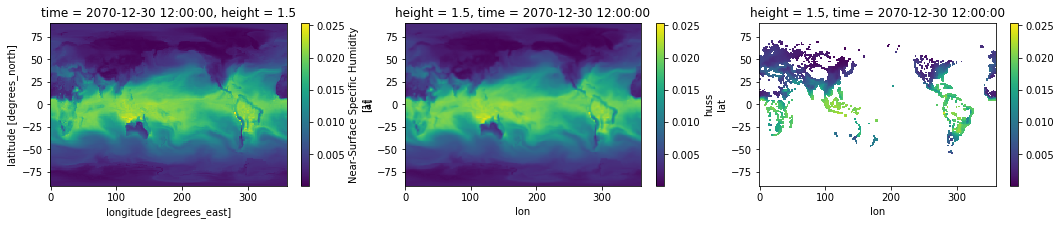

It takes elapsed_time 0.7034895420074463 to plot the layer
It takes elapsed_time 17.67421579360962 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/tas_day_HadGEM2-CC_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.6053440570831299 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/tas_day_HadGEM2-CC_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.154977560043335 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/tas_day_HadGEM2-CC_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.7416722774505615 to load the data
*********Start to merge*********
It takes elapsed_time 5.4885547161102295 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.02628350257873535 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.13268232345581 to regrid the laye

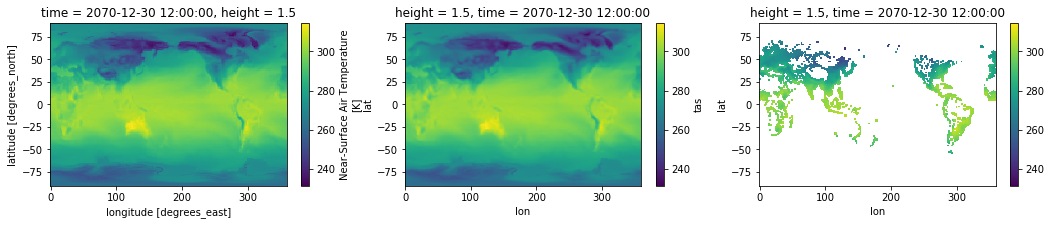

It takes elapsed_time 0.7040717601776123 to plot the layer
It takes elapsed_time 17.750045776367188 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/uas_day_HadGEM2-CC_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.4834129810333252 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/uas_day_HadGEM2-CC_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 0.9611856937408447 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/uas_day_HadGEM2-CC_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.4502804279327393 to load the data
*********Start to merge*********
It takes elapsed_time 5.322829723358154 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_144x192_192x288_peri.nc
It takes elapsed_time 0.07586550712585449 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.067477941513062 to regrid the laye

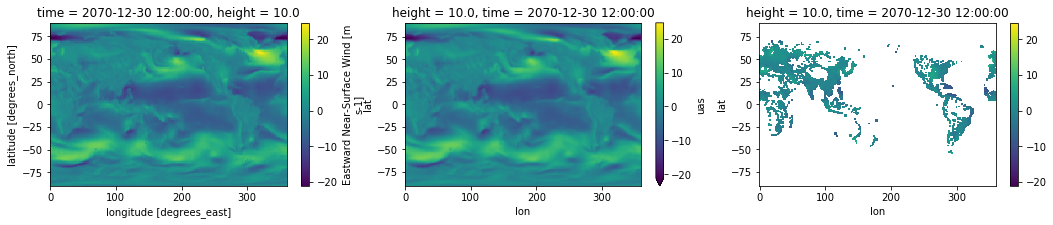

It takes elapsed_time 0.7056412696838379 to plot the layer
It takes elapsed_time 17.26979684829712 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/vas_day_HadGEM2-CC_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.5380673408508301 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/vas_day_HadGEM2-CC_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.0085649490356445 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/vas_day_HadGEM2-CC_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.539506435394287 to load the data
*********Start to merge*********
It takes elapsed_time 5.343472480773926 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_144x192_192x288_peri.nc
It takes elapsed_time 0.06779980659484863 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.086558103561401 to regrid the layer


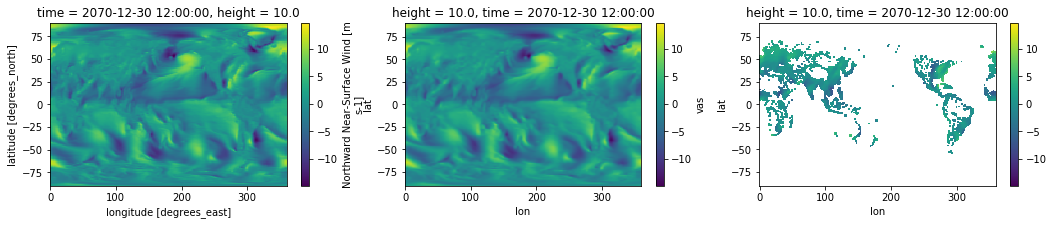

It takes elapsed_time 0.7083315849304199 to plot the layer
It takes elapsed_time 17.392945289611816 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/pr_day_HadGEM2-CC_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.5495824813842773 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/pr_day_HadGEM2-CC_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.0807292461395264 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/pr_day_HadGEM2-CC_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.7109711170196533 to load the data
*********Start to merge*********
It takes elapsed_time 5.364598751068115 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.02559375762939453 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.080621242523193 to regrid the layer
**

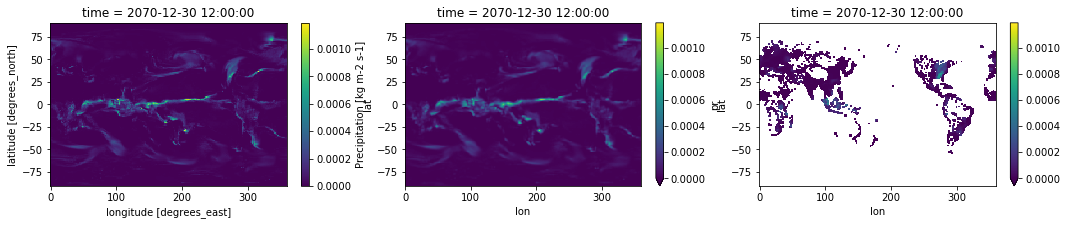

It takes elapsed_time 0.6773829460144043 to plot the layer
It takes elapsed_time 17.50470733642578 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/prsn_day_HadGEM2-CC_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.5358874797821045 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/prsn_day_HadGEM2-CC_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.055708646774292 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/prsn_day_HadGEM2-CC_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.587601661682129 to load the data
*********Start to merge*********
It takes elapsed_time 5.391314744949341 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.046410560607910156 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.081472396850586 to regrid the laye

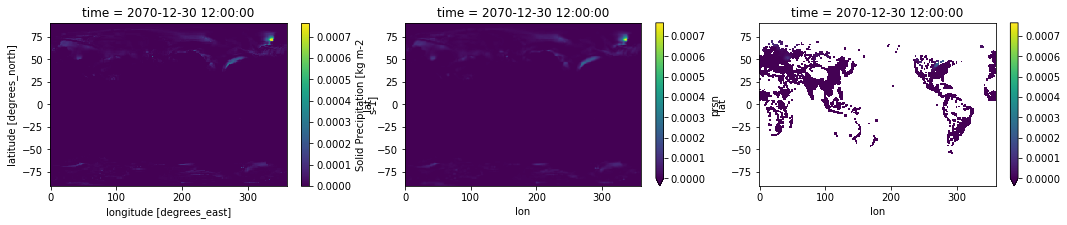

It takes elapsed_time 0.6742246150970459 to plot the layer
It takes elapsed_time 17.427104473114014 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rlds_day_HadGEM2-CC_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.5982136726379395 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rlds_day_HadGEM2-CC_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.2023563385009766 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rlds_day_HadGEM2-CC_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.763871431350708 to load the data
*********Start to merge*********
It takes elapsed_time 5.372562408447266 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.025443077087402344 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.079079627990723 to regrid th

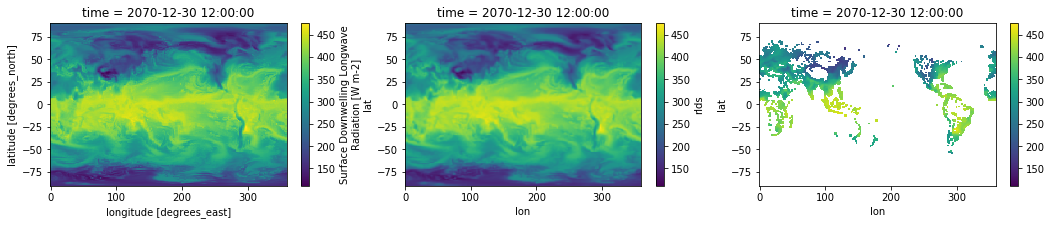

It takes elapsed_time 0.7154440879821777 to plot the layer
It takes elapsed_time 17.602447986602783 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rlus_day_HadGEM2-CC_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.6244077682495117 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rlus_day_HadGEM2-CC_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.1567635536193848 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rlus_day_HadGEM2-CC_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.7281222343444824 to load the data
*********Start to merge*********
It takes elapsed_time 5.4107346534729 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.027568340301513672 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.063759565353394 to regrid the

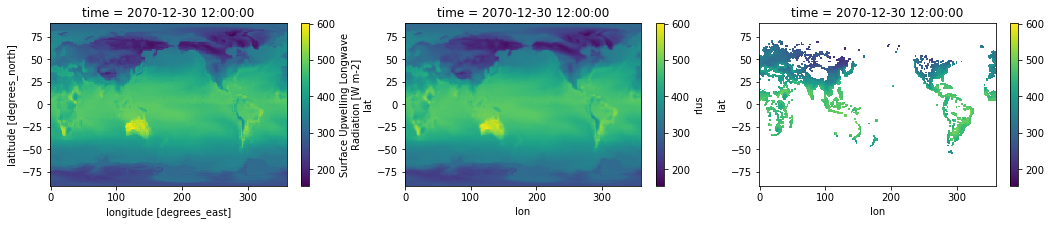

It takes elapsed_time 0.6901507377624512 to plot the layer
It takes elapsed_time 17.565930128097534 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rsds_day_HadGEM2-CC_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.6669638156890869 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rsds_day_HadGEM2-CC_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.1910710334777832 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rsds_day_HadGEM2-CC_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.7937445640563965 to load the data
*********Start to merge*********
It takes elapsed_time 5.411245822906494 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.028077363967895508 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.090705394744873 to regrid t

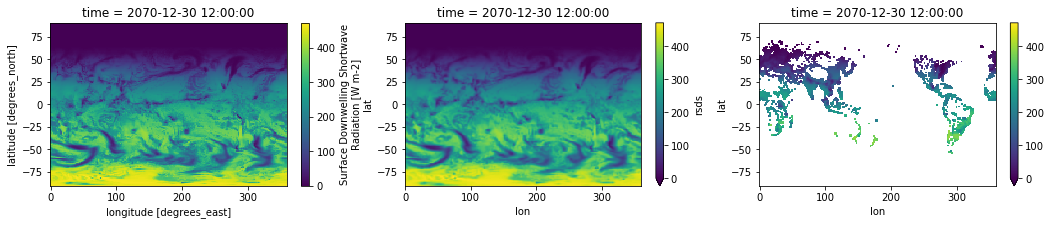

It takes elapsed_time 0.6847691535949707 to plot the layer
It takes elapsed_time 17.65401601791382 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rsus_day_HadGEM2-CC_rcp85_r1i1p1_20601201-20651130.nc
It takes elapsed_time 0.5394604206085205 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rsus_day_HadGEM2-CC_rcp85_r1i1p1_20651201-20701130.nc
It takes elapsed_time 1.1570703983306885 to load the data
/glade/scratch/zhonghua/CMIP5/HadGEM2-CC/rsus_day_HadGEM2-CC_rcp85_r1i1p1_20701201-20751130.nc
It takes elapsed_time 1.6752686500549316 to load the data
*********Start to merge*********
It takes elapsed_time 5.409788131713867 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.054918766021728516 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.065549373626709 to regrid th

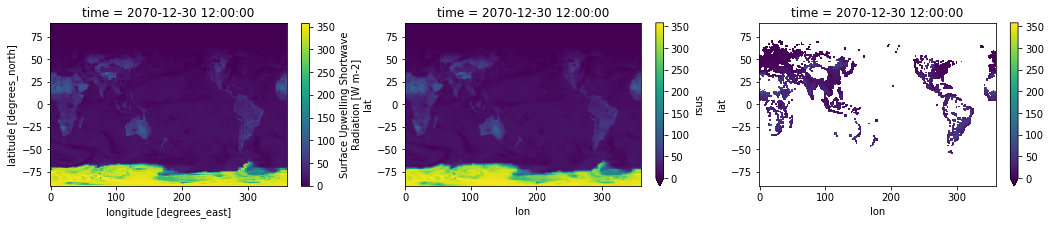

It takes elapsed_time 0.7039749622344971 to plot the layer
It takes elapsed_time 17.555739164352417 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2060, 2071, 5)

In [9]:
df = get_urban_df(ds)

It takes elapsed_time 33.03066062927246 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

246.98576092720032
